In [1]:
import pandas as pd


In [2]:
import talib



In [3]:

# Load CSV
stock_data = pd.read_csv(
    r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\META.csv", 
    parse_dates=['Date'], 
    index_col='Date'
)

# Check the data
print(stock_data.head())
print(stock_data.info())


                Close       High        Low       Open     Volume
Date                                                             
2012-05-18  37.995762  44.724282  37.767172  41.792356  573576400
2012-05-21  33.821495  36.435382  32.797807  36.306177  168192700
2012-05-22  30.810066  33.384198  30.750434  32.410203  101786600
2012-05-23  31.803938  32.300874  31.167860  31.177799   73600000
2012-05-24  32.827625  33.006523  31.575347  32.748117   50237200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2012-05-18 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2923 non-null   float64
 1   High    2923 non-null   float64
 2   Low     2923 non-null   float64
 3   Open    2923 non-null   float64
 4   Volume  2923 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 137.0 KB
None


Calculate Technical Indicators with TA-Lib

In [4]:


# Simple Moving Average (20 periods)
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)

# Exponential Moving Average (20 periods)
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)

# MACD
stock_data['MACD'], stock_data['MACD_signal'], stock_data['MACD_hist'] = talib.MACD(
    stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
stock_data['upper'], stock_data['middle'], stock_data['lower'] = talib.BBANDS(
    stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
)

print(stock_data.tail())


                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  351.224823  355.011477  349.068105  353.401377  11772800   
2023-12-26  352.655975  354.792827  351.284456  352.814999   9898600   
2023-12-27  355.637543  356.800387  353.132994  353.888347  13207900   
2023-12-28  356.124634  359.682686  355.617749  357.496184  11798800   
2023-12-29  351.791290  357.794292  349.664418  356.790470  14987100   

                SMA_20      EMA_20     RSI_14      MACD  MACD_signal  \
Date                                                                   
2023-12-22  332.302945  335.581703  67.333885  6.945367     4.729907   
2023-12-26  333.303278  337.207824  68.187000  7.436800     5.271285   
2023-12-27  334.239505  338.963036  69.947874  7.974921     5.812012   
2023-12-28  335.537503  340.597473  70.237702  8.344500     6.318510   
2023-12-29  336.869788  341.663551  64.296803  8.193282     6.6

Visualize the Data

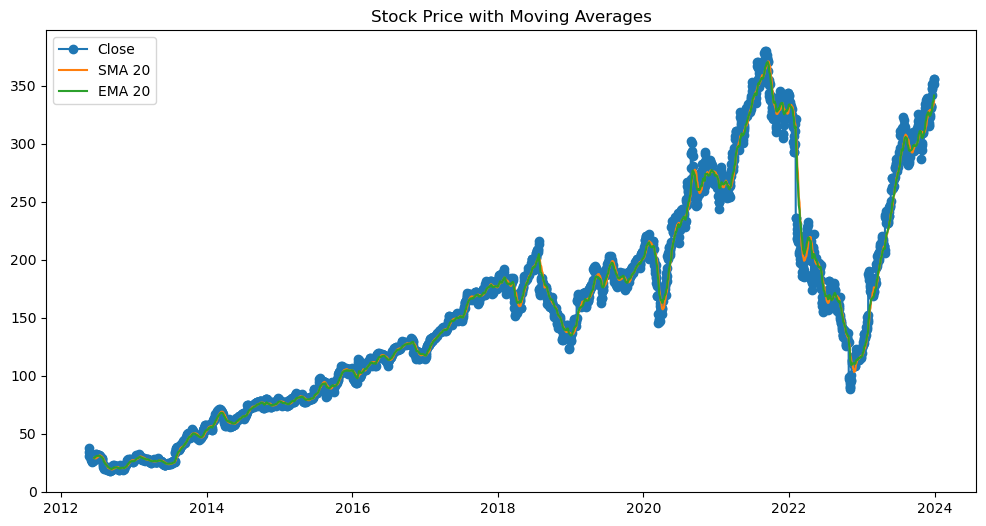

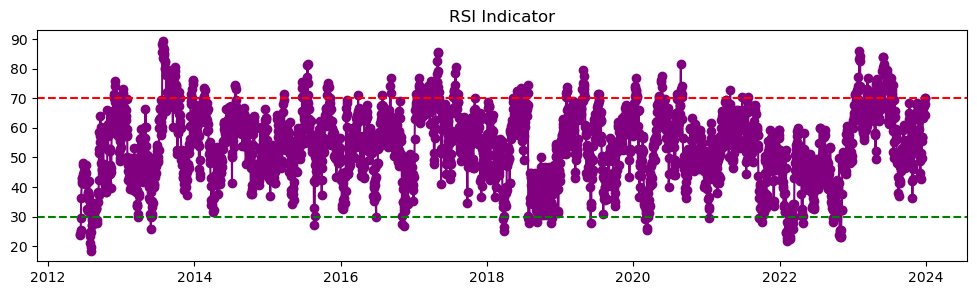

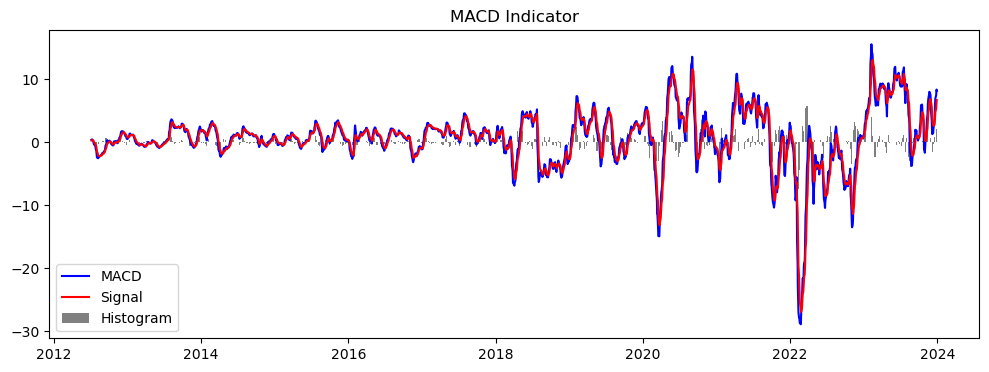

In [5]:
import matplotlib.pyplot as plt

# Price + Moving Averages
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close', marker='o')
plt.plot(stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data['EMA_20'], label='EMA 20')
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12,3))
plt.plot(stock_data['RSI_14'], label='RSI 14', color='purple', marker='o')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()

# MACD
plt.figure(figsize=(12,4))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MACD_signal'], label='Signal', color='red')
plt.bar(stock_data.index, stock_data['MACD_hist'], label='Histogram', color='gray')
plt.title("MACD Indicator")
plt.legend()
plt.show()
